# Data Science Job Salary Predictions

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# loading the dataset
df = pd.read_csv("ds_jobs.csv")

In [3]:
# Lets see the dataset 
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


# Exploring Dataset

In [4]:
# Finding the how much rows and columns dataset have
df.shape

(956, 15)

In [5]:
# Which are all columns we have lets gone be see
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [6]:
# Lets check the datatypes
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [7]:
# Get Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


_**Note:** No features has NaN values, but there may be the case where the Nan Values are replaced by some other values(s) like -1,0, etc._

In [8]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


_**Note:** Look at the above table there is min columns has cotains -1 values it means NaN values replaced by -1 in numeric features.

# **Exploratory Data Analysis & Data Cleaning**
* Plotting bargraphs and countplots for numerical and categorical features respectively.
* Removing unwanted columns
* Handling NaN/missing values
* Removing unwanted alphabet/special characters from the features

In [9]:
# Removing Unwanted column
print('Shape before moving:{}'.format(df.shape))
df.drop(labels=['Unnamed: 0'],axis='columns',inplace=True)
print('Shape before moving:{}'.format(df.shape))

Shape before moving:(956, 15)
Shape before moving:(956, 14)


In [10]:
# Import Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

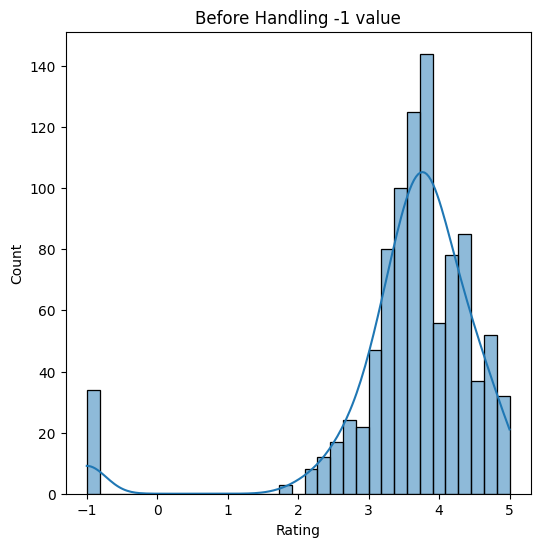

In [13]:
# Visualising 'Rating' column
plt.figure(figsize=(6,6))
g = sns.histplot(df['Rating'],kde=True)
p = plt.title('Before Handling -1 value')

_**Note: Since the Rating feature follows the Gaussian/Normal Distribution**, we'll replace -1 values with mean of the distribution._

In [14]:
df['Rating'].min()

np.float64(-1.0)

In [17]:
# Handling -1. Values in Rating column
df['Rating'] = df['Rating'].apply(lambda x: np.nan if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [18]:
df['Rating'].min()

np.float64(1.9)

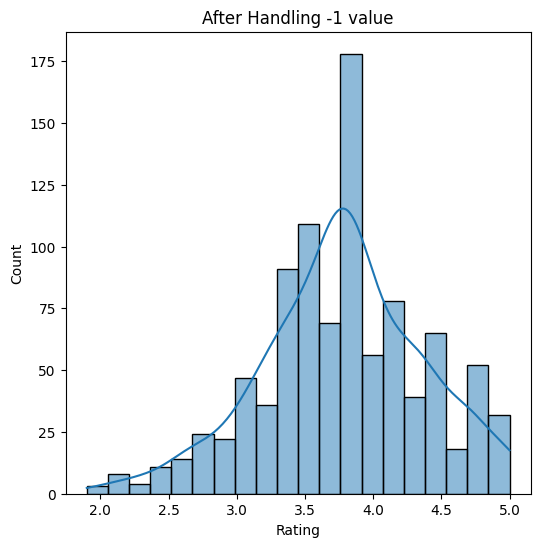

In [21]:
# Visualising 'Rating' column
plt.figure(figsize=(6,6))
g = sns.histplot(df['Rating'],kde=True)
p = plt.title('After Handling -1 value')

Text(0, 0.5, 'Rating')

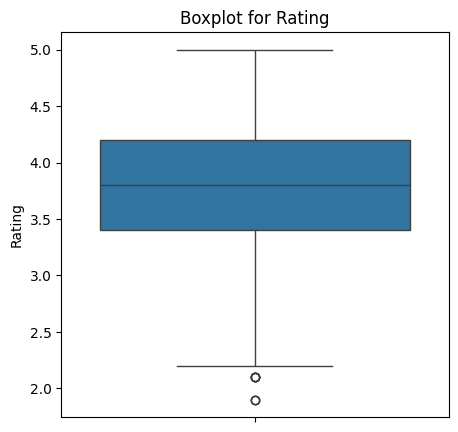

In [23]:
# Lets Check outliers in 'Rating' Column
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating',data=df,orient='v')
plt.title('Boxplot for Rating')
plt.ylabel('Rating')

Text(0.5, 1.0, 'Before handling -1 value')

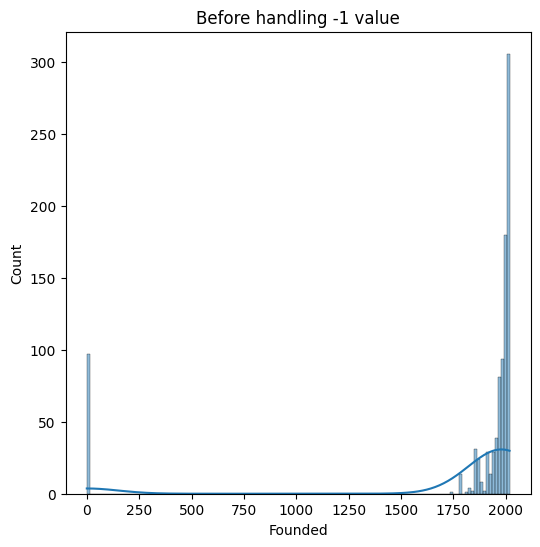

In [26]:
# Visualising the 'Founded' Column
plt.figure(figsize=(6,6))
sns.histplot(df['Founded'],kde=True)
plt.title('Before handling -1 value')

_**Note: Since Founded feature does not follow Gaussian/Normal distribution but is Right-Skewed graph**, we'll replacing the -1 values with median of the distribution._

In [27]:
df['Founded'].min()

np.int64(-1)

In [29]:
# Handling -1 values in Founded column
df['Founded'] = df['Founded'].apply(lambda x: np.nan if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

In [30]:
df['Founded'].min()

np.int64(1744)

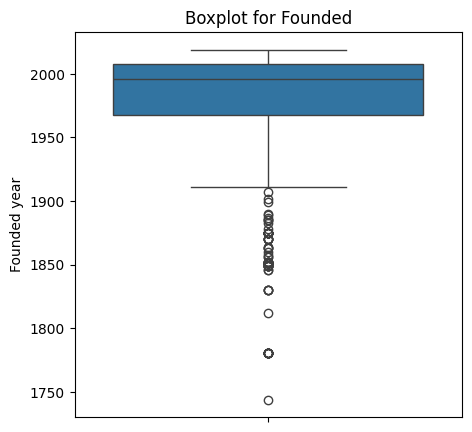

In [34]:
# Lets check the Outliers in Founded
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df, orient='v')
p = plt.title('Boxplot for Founded')
p = plt.ylabel('Founded year')

_**Note: There is too much Outliers

In [35]:
# Lets Clean the 'Job Title' Column
df['Job Title'].value_counts().nlargest(20)

Job Title
Data Scientist                                    178
Data Engineer                                      68
Senior Data Scientist                              42
Data Analyst                                       18
Senior Data Engineer                               17
Business Intelligence Analyst                      13
Senior Data Analyst                                12
Lead Data Scientist                                 8
Data Science Manager                                7
Marketing Data Analyst                              6
Machine Learning Engineer                           6
Sr. Data Engineer                                   6
Principal Data Scientist                            6
Analytics Manager                                   5
Lead Data Engineer                                  5
R&D Specialist/ Food Scientist                      4
Data Engineer 5 - Contract                          4
Staff Scientist-Downstream Process Development      4
Senior Research Sc

In [36]:
# In this function we just first converted the job role into lower case and then to proper name 
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

In [37]:
# Applying function 
df['job_title']= df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

job_title
data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: count, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_42872\1328123492.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


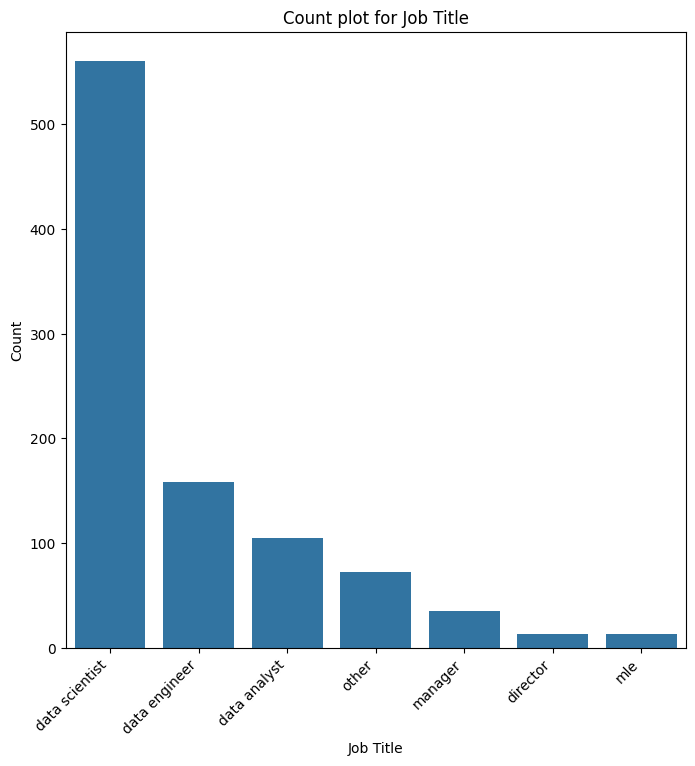

In [38]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [39]:
# Lets Check the seniority has high value employers
def title_seniority(title):
    if 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

In [40]:
df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

job_seniority
other    701
sr       252
jr         3
Name: count, dtype: int64

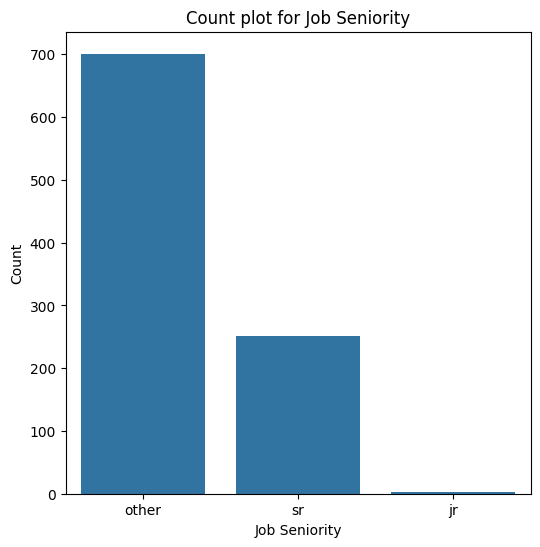

In [41]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
p = plt.title('Count plot for Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

In [42]:
# Remove the Job Title Column 
df.drop(labels = ['Job Title'], axis=1 ,inplace =True)

In [43]:
df["Salary Estimate"].value_counts().unique

<bound method Series.unique of Salary Estimate
-1                                  214
$21-$34 Per Hour(Glassdoor est.)      6
$49K-$113K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$86K-$143K (Glassdoor est.)           6
                                   ... 
$105K-$173K (Glassdoor est.)          1
$46K-$85K (Glassdoor est.)            1
$71K-$134K (Glassdoor est.)           1
$102K-$190K (Glassdoor est.)          1
$27-$47 Per Hour(Glassdoor est.)      1
Name: count, Length: 417, dtype: int64>

In [44]:
# Cleaning Salary Estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [45]:
salary.value_counts()

Salary Estimate
-1                  214
$21-$34 Per Hour      6
$49K-$113K            6
$54K-$115K            6
$86K-$143K            6
                   ... 
$105K-$173K           1
$46K-$85K             1
$71K-$134K            1
$102K-$190K           1
$27-$47 Per Hour      1
Name: count, Length: 417, dtype: int64

In [47]:
salary = salary.apply(lambda x: np.nan if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [48]:
# Removing '$' and 'K' from 'Salary Estimate' column
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [49]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

_**Note:** **Converting per hour salaries to per year salaries** (assuming 45 work hours per week and 52 working weeks), and removing **employer_provided_salary** from the salary array._

In [50]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [51]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[:38]

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 '], dtype=object)

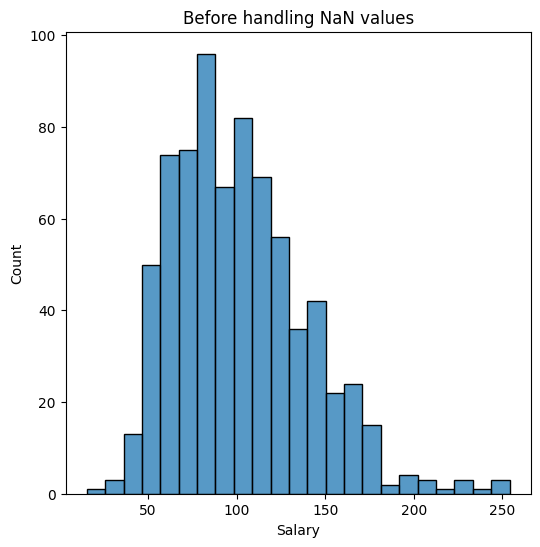

In [55]:
# Creating column for salary i.e. average of the range
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
g = sns.histplot(df['Salary'])
p = plt.title('Before handling NaN values')

_**Note: Since the Rating feature follows the Gaussian/Normal Distribution**, but since there are few outlies, we'll replace -1 values with median of the distribution._

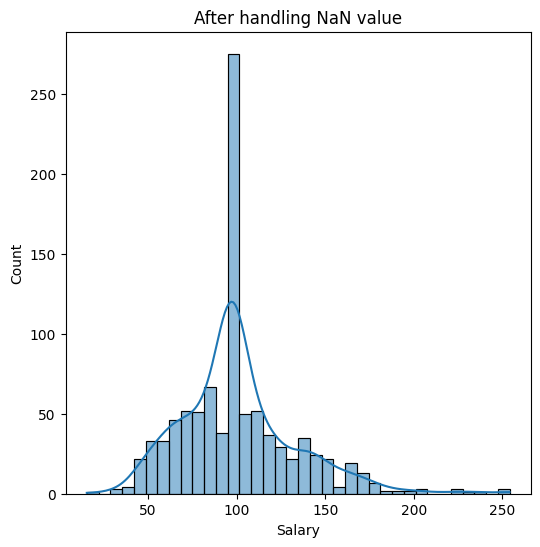

In [56]:
# Handling NaN values in Salary column
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.histplot(df['Salary'],kde=True)
p = plt.title('After handling NaN value')

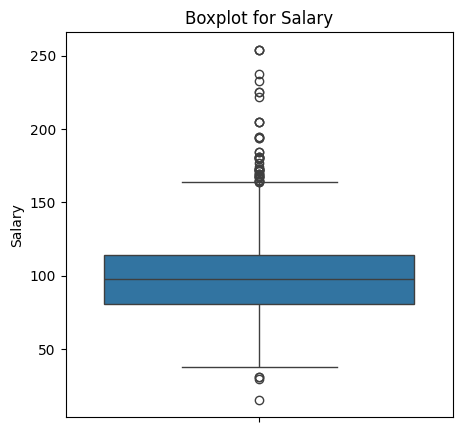

In [57]:
# Outliers in Salary
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary', data=df, orient='v')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')

In [58]:
# Cleaning Company Name column
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])

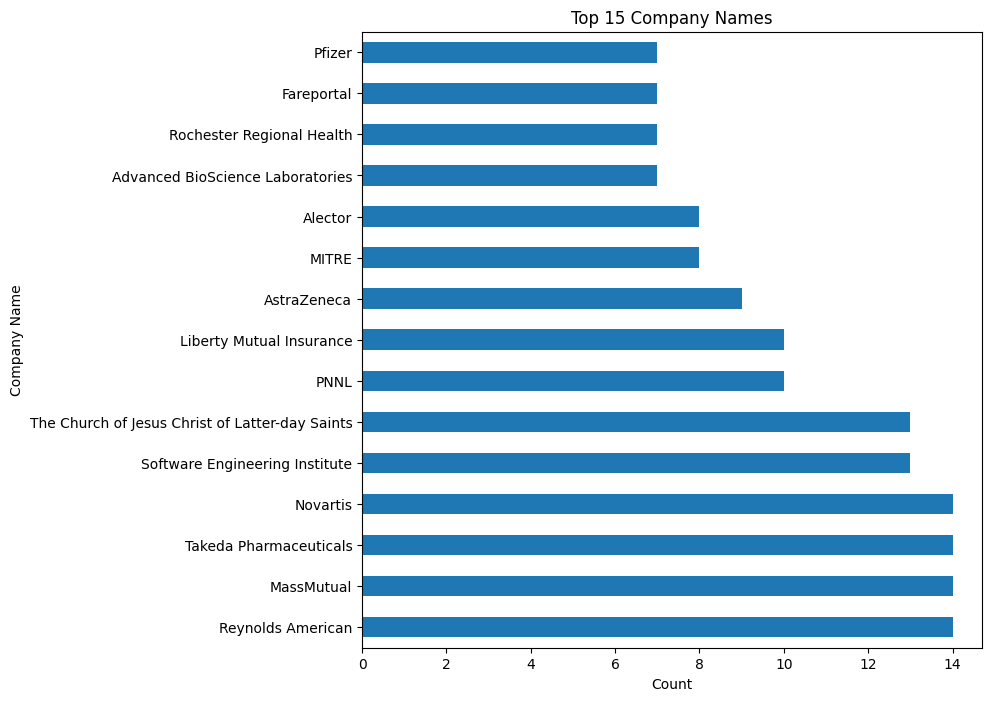

In [59]:
plt.figure(figsize=(8,8))
g = df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [60]:
# Creating a column 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Total number of unique locations: {}'.format(len(df['job_location'].unique())))

Total number of unique locations: 46


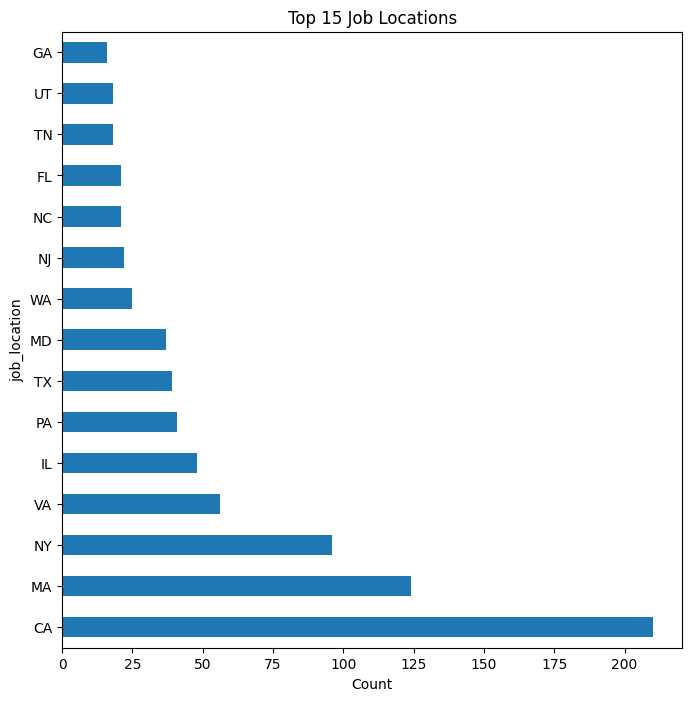

In [61]:
plt.figure(figsize=(8,8))
g = df["job_location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Count')

In [62]:
df['Size'].value_counts()

Size
1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: count, dtype: int64

In [63]:
# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

C:\Users\ACER\AppData\Local\Temp\ipykernel_42872\3060236740.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


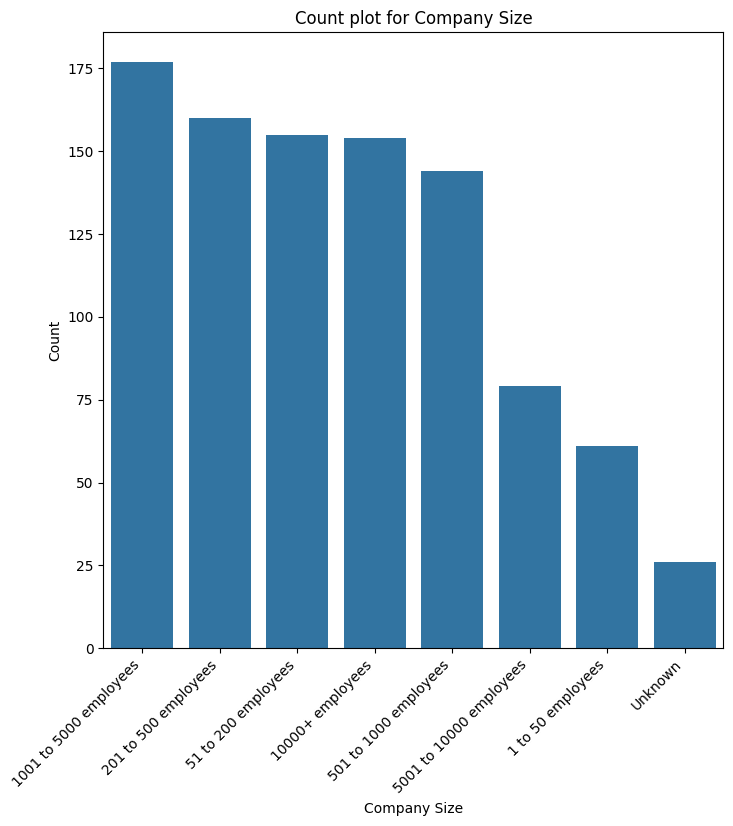

In [64]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [65]:
# Cleaning 'Type of Ownership' column
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
College / University               15
Hospital                           15
-1                                 11
Unknown                            11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: count, dtype: int64

In [66]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

C:\Users\ACER\AppData\Local\Temp\ipykernel_42872\4199033700.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


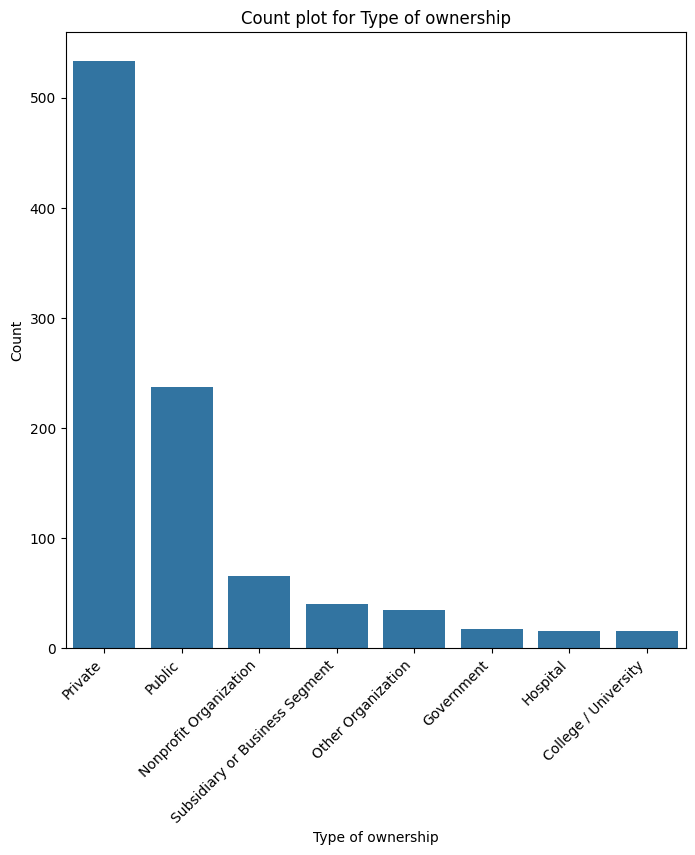

In [67]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [68]:
# Cleaning 'Industry' column
df['Industry'].value_counts()

Industry
Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer Hardware & Software                70
Insurance Carriers                          65
Enterprise Software & Network Solutions     56
                                          ... 
Auctions & Galleries                         1
Accounting                                   1
Health Care Products Manufacturing           1
Health, Beauty, & Fitness                    1
Beauty & Personal Accessories Stores         1
Name: count, Length: 63, dtype: int64

In [69]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

C:\Users\ACER\AppData\Local\Temp\ipykernel_42872\3401583575.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


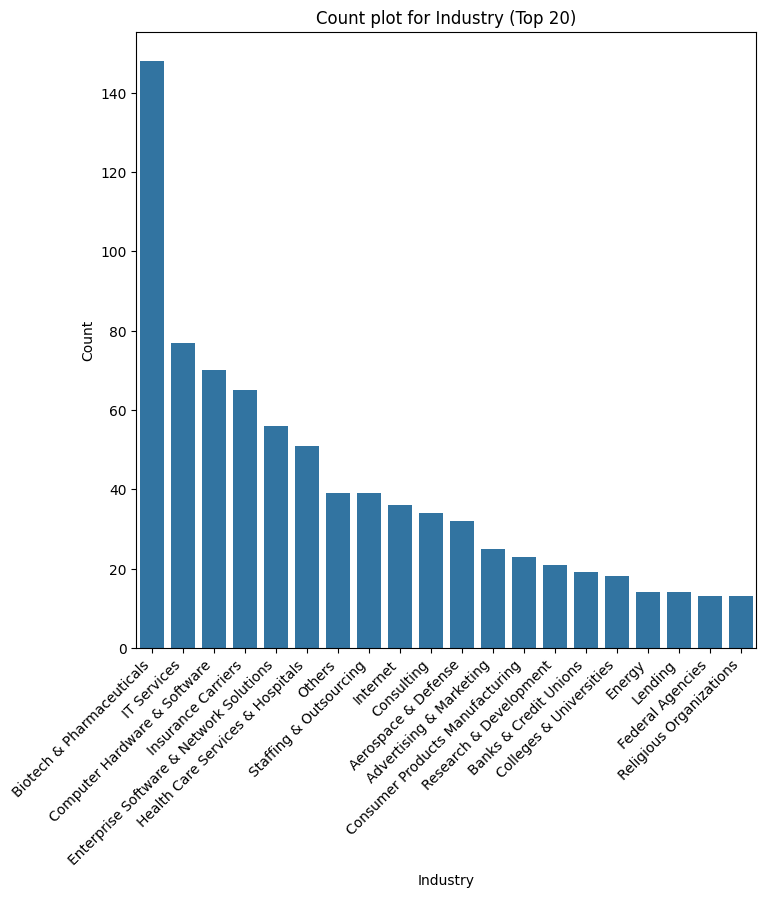

In [70]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Count plot for Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [71]:
# Cleaning 'Sector' column
df['Sector'].value_counts()

Sector
Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Non-Profit                             16
Retail                                 16
Oil, Gas, Energy & Utilities           15
Government                             13
Media                                  13
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Telecommunications                      6
Consumer Services                       4
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Mining & Metals                         3
Agriculture & Forestry     

In [72]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

C:\Users\ACER\AppData\Local\Temp\ipykernel_42872\2694475278.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


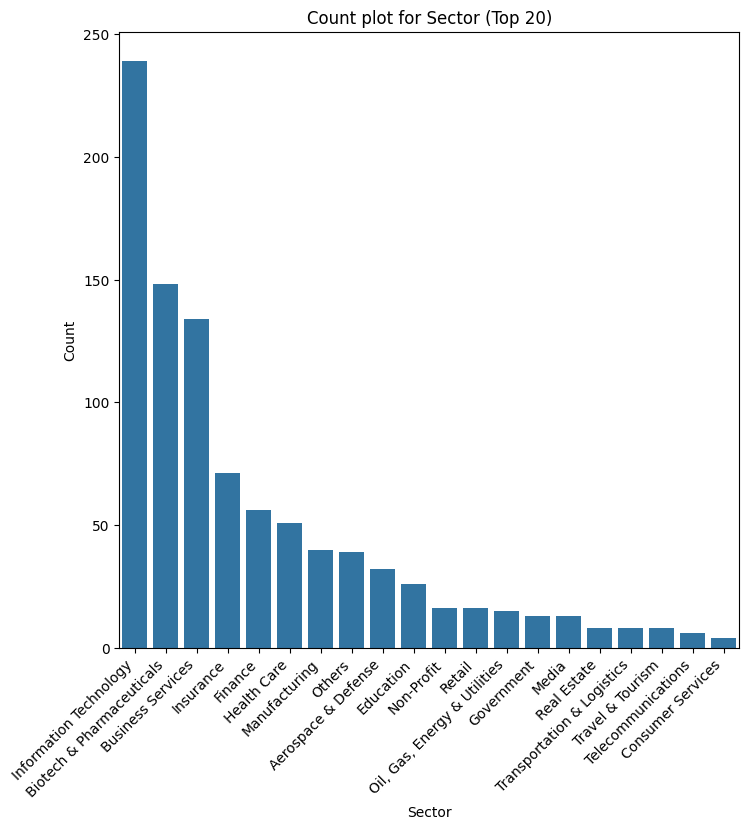

In [73]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for Sector (Top 20)')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [74]:
# Cleaning 'Revenue' column
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: count, dtype: int64

In [75]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

C:\Users\ACER\AppData\Local\Temp\ipykernel_42872\2467591634.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


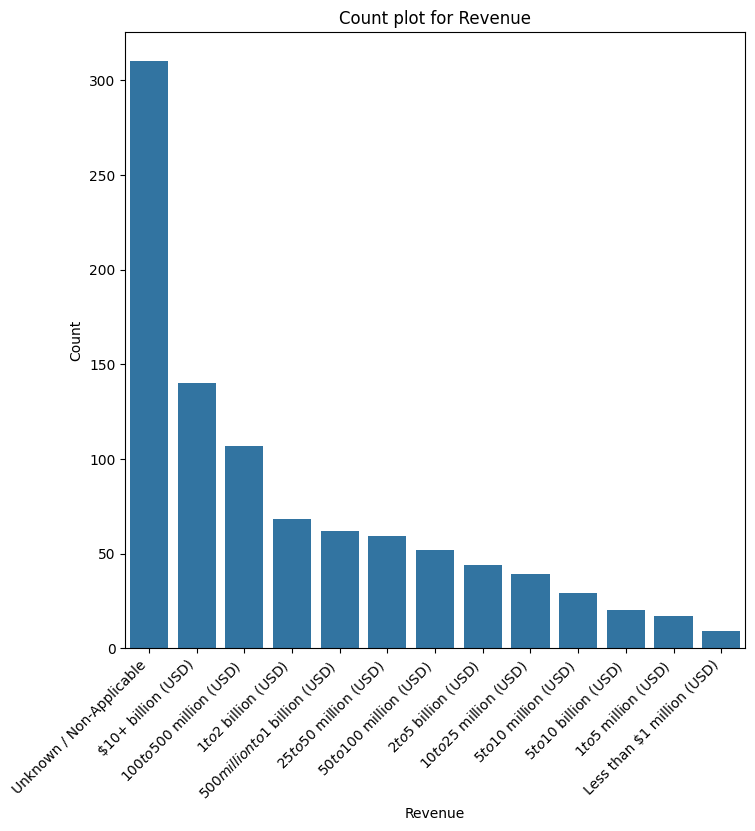

In [79]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [80]:
# Cleaning 'Competitors' column
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
954                                               Slalom
955                                                   -1
Name: Competitors, Length: 956, dtype: object

In [81]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

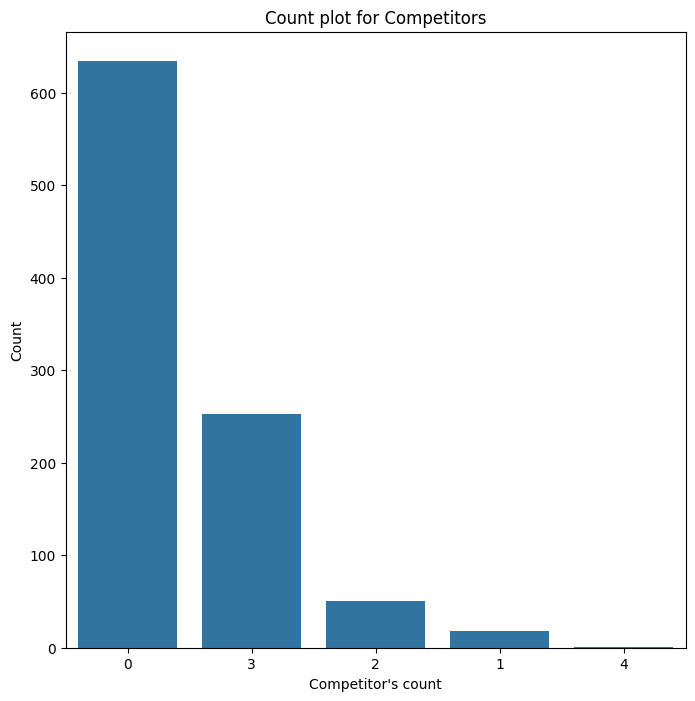

In [82]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

In [83]:
# Dataset till now
df.tail()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location
951,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Public,Internet,Information Technology,$100 to $500 million (USD),3,data engineer,sr,102.5,TN
952,$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,data scientist,other,73.5,PA
953,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,1996,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,manager,other,127.5,PA
954,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW,"Austin, TX","Portland, OR",201 to 500 employees,2015,Private,IT Services,Information Technology,$25 to $50 million (USD),1,data engineer,other,97.5,TX
955,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),0,data scientist,other,93.5,OH


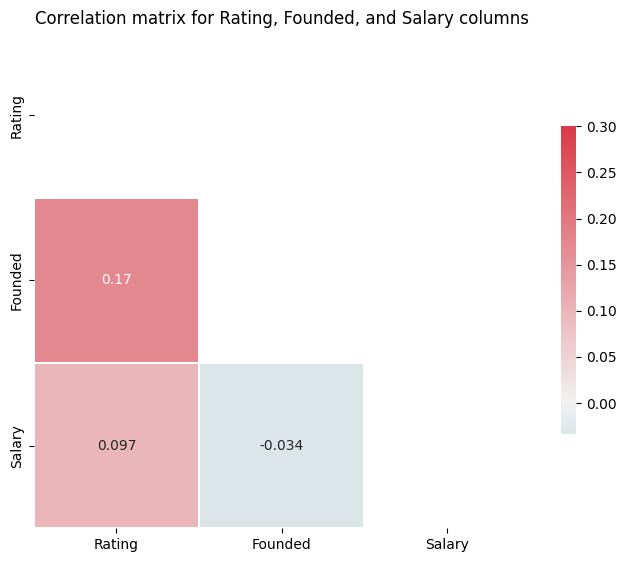

In [84]:
# Finding and plotting the correlation between numerical features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

_**Insight:** Rating-Founded columns have **positive correlation**, whereas Salary-Founded columns have **negative correlation**. Also since the correlation is not high amongst all these numerical features, there is **no case of multicolliniearity.**_

# **Feature Engineering**
* Creating new features from existing features
* Trimming Columns
* Handling ordinal and nominal categorical features
* Feature Selection



**Creating new features from existing features**
* Adding column of _job_in_headquarters_
* Adding columns of _python, excel, sql, tableau jobs_






In [85]:
# Creating column of 'job_in_headquarters'
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

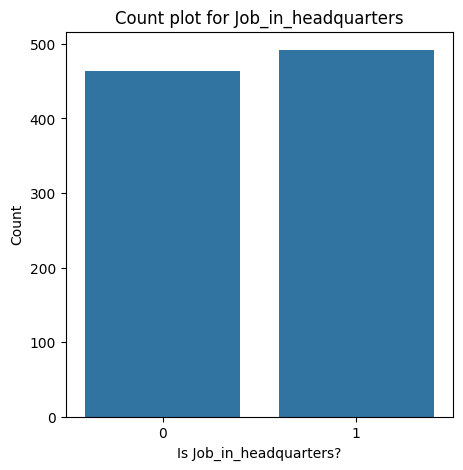

In [86]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='job_in_headquarters', data=df)
p = plt.title('Count plot for Job_in_headquarters')
p = plt.xlabel("Is Job_in_headquarters?")
p = plt.ylabel('Count')

In [87]:
df.drop(labels=['Location'], axis=1, inplace=True)

In [88]:
# Creating columns of 'python, excel, sql, tableau' jobs
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

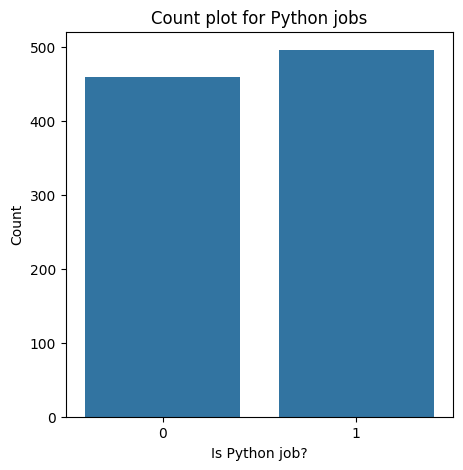

In [89]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=df)
p = plt.title('Count plot for Python jobs')
p = plt.xlabel("Is Python job?")
p = plt.ylabel('Count')

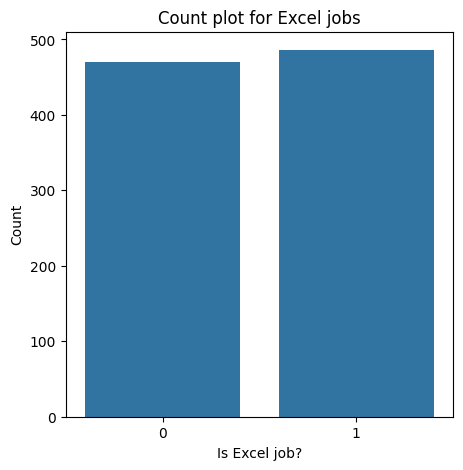

In [90]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=df)
p = plt.title('Count plot for Excel jobs')
p = plt.xlabel("Is Excel job?")
p = plt.ylabel('Count')

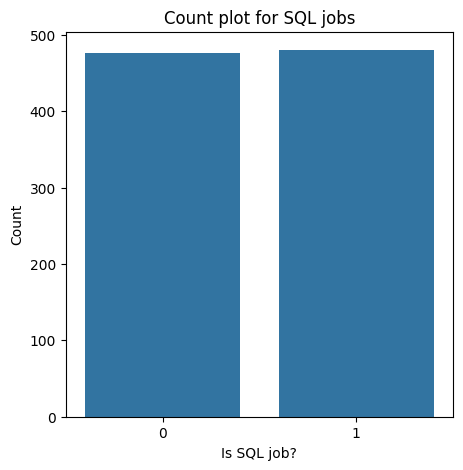

In [91]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=df)
p = plt.title('Count plot for SQL jobs')
p = plt.xlabel("Is SQL job?")
p = plt.ylabel('Count')

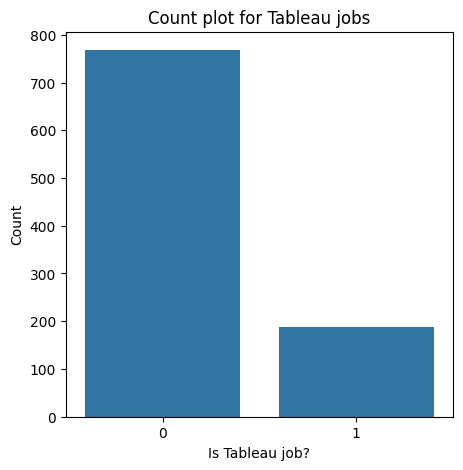

In [92]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=df)
p = plt.title('Count plot for Tableau jobs')
p = plt.xlabel("Is Tableau job?")
p = plt.ylabel('Count')

In [93]:
df.drop(labels=['Job Description'], axis=1, inplace=True)

**• Trimming Columns**<br/>
_Features having more than 10 categories are trimmed so as to **reduce the dimensionality.**_

In [94]:
# Trimming the 'Sector' column

# Taking top 9 Sector and replacing remaining by 'Others'
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
  if text not in sector_list:
    return 'Others'
  else:
    return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

In [95]:
df['Sector'].value_counts()

Sector
Information Technology       239
Others                       159
Biotech & Pharmaceuticals    148
Business Services            134
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
Aerospace & Defense           32
Education                     26
Name: count, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_42872\3601580713.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


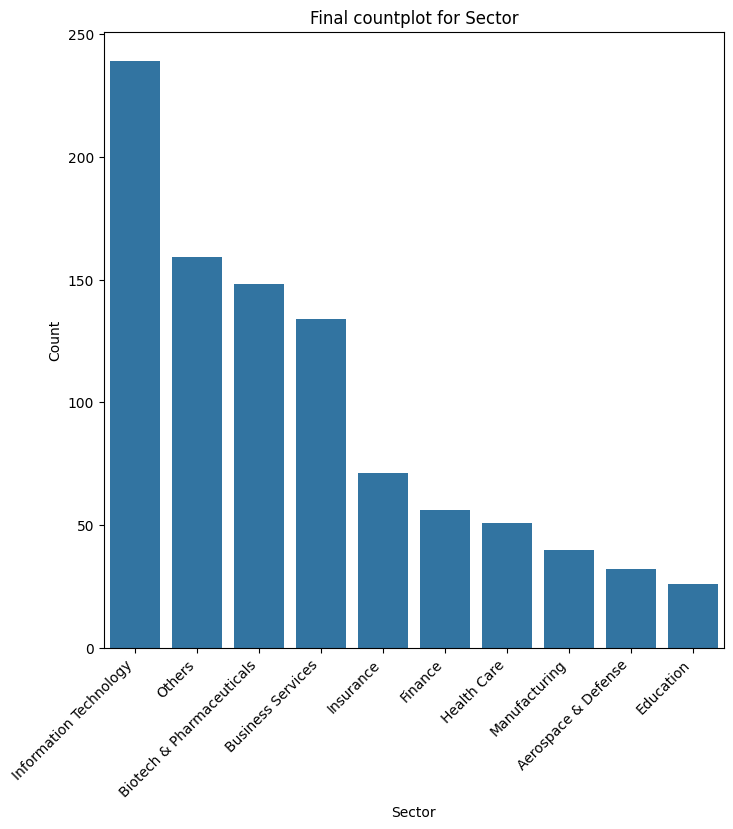

In [96]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
p = plt.title('Final countplot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [97]:
# Trimming the 'job_location' column

# Taking top 9 States and replacing others by 'Others'
job_location_list = list(df['job_location'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

df['job_location'] = df['job_location'].apply(job_location_simplifier)

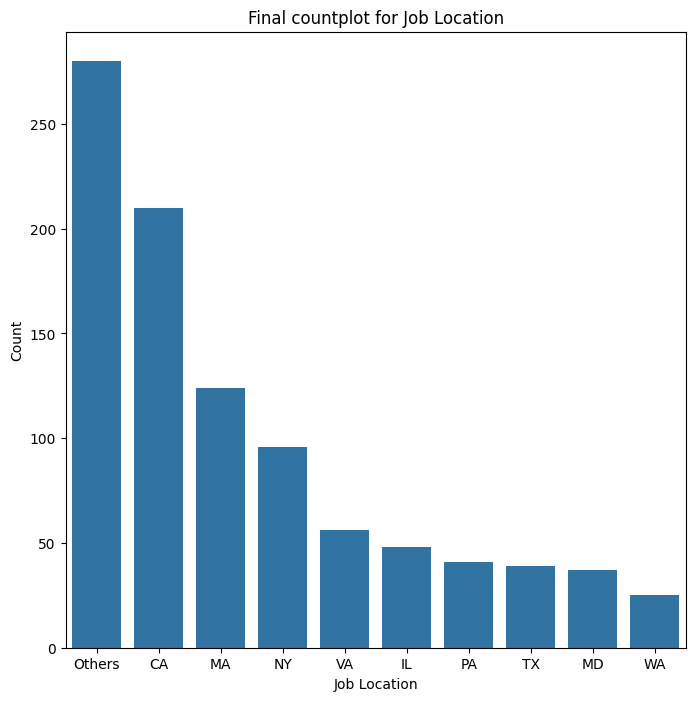

In [98]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_location', data=df, order = df['job_location'].value_counts().index)
p = plt.title('Final countplot for Job Location')
p = plt.xlabel('Job Location')
p = plt.ylabel('Count')

In [99]:
df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [100]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'job_title', 'job_seniority', 'Salary',
       'job_in_headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [101]:
# Renaming columns
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

**• Handling ordinal categorical features**<br/>
_Ordinal features are **categorical variables that have some order associated with them** (e.g. size, rating, remark, etc.)_

In [102]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [103]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

In [104]:
# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

**• Handling nominal categorical features**<br/>
_Nominal features are **categorical variables that have no numerical importance** (e.g. occupation, name, etc.)_

In [105]:
# Removing 'type_of_ownership' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['type_of_ownership'], data=df, prefix='ownership')
print('After: {}'.format(df.shape))

Before: (956, 15)
After: (956, 22)


In [106]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['sector'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 22)
After: (956, 31)


In [107]:
# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['job_title'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 31)
After: (956, 37)


In [108]:
df.head()

,company_rating,company_size,company_founded,revenue,competitors,job_seniority,salary,job_in_headquarters,python_job,excel_job,...,sector_Insurance,sector_Manufacturing,sector_Others,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_mle,job_title_other
0,3.8,4,1973,6,0,0,72.0,0,1,1,...,False,False,False,False,False,True,False,False,False,False
1,3.4,7,1984,10,0,0,87.5,0,1,0,...,False,False,False,False,False,True,False,False,False,False
2,4.8,4,2010,7,0,0,85.0,1,1,1,...,False,False,False,False,False,True,False,False,False,False
3,3.8,5,1965,8,3,0,76.5,1,1,0,...,False,False,True,False,False,True,False,False,False,False
4,2.9,2,1998,0,3,0,114.5,1,1,1,...,False,False,False,False,False,True,False,False,False,False


In [109]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)

In [110]:
df.head()

,company_rating,company_size,company_founded,revenue,competitors,job_seniority,salary,job_in_headquarters,python_job,excel_job,...,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_mle
0,3.8,4,1973,6,0,0,72.0,0,1,1,...,False,False,False,False,False,False,True,False,False,False
1,3.4,7,1984,10,0,0,87.5,0,1,0,...,True,False,False,False,False,False,True,False,False,False
2,4.8,4,2010,7,0,0,85.0,1,1,1,...,False,False,False,False,False,False,True,False,False,False
3,3.8,5,1965,8,3,0,76.5,1,1,0,...,False,False,False,False,False,False,True,False,False,False
4,2.9,2,1998,0,3,0,114.5,1,1,1,...,False,False,False,False,False,False,True,False,False,False


**• Feature Selection**<br/>
_Selecting features based on **information gain (mutual_info_regression) and correlation matrix**_

In [111]:
X = df.drop('salary', axis=1)
y = df['salary']

In [112]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [113]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x00000206404E63E0>)

C:\Users\ACER\AppData\Local\Temp\ipykernel_42872\3063560395.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


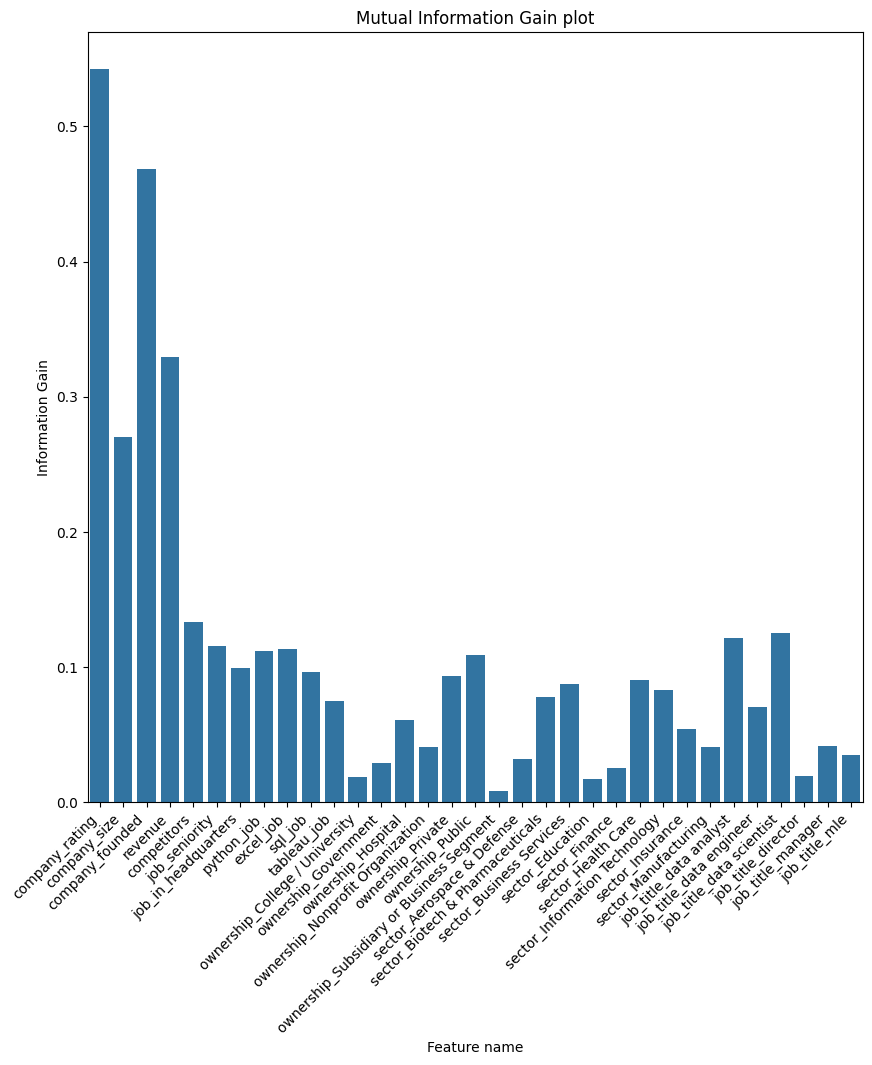

In [114]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Mutual Information Gain plot')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

_**Insight:** From feature importance chart, it is evident that there are **atleast 20 features that impact the target variable.**_

C:\Users\ACER\AppData\Local\Temp\ipykernel_42872\1154283793.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


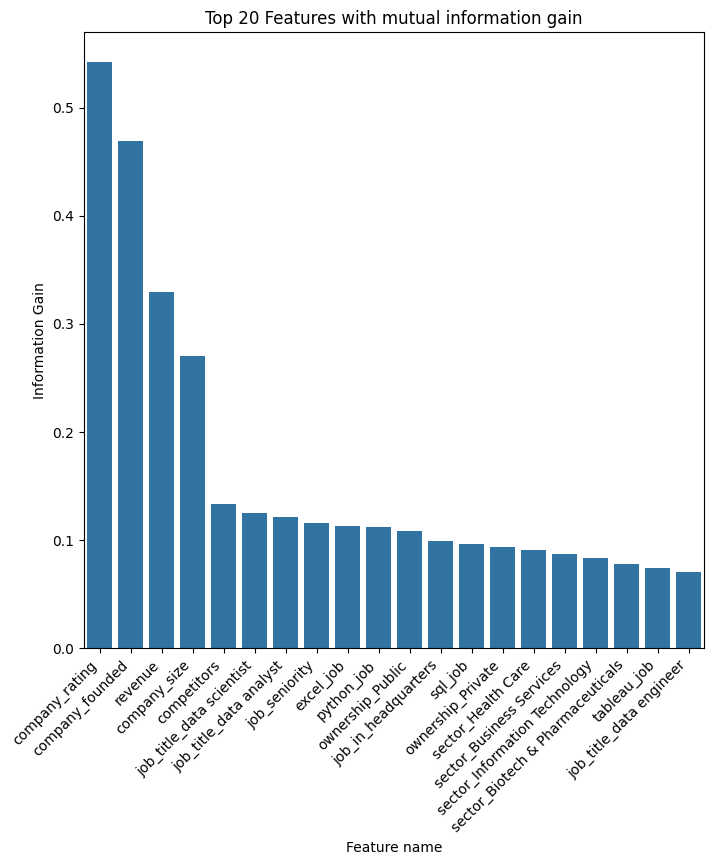

In [115]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

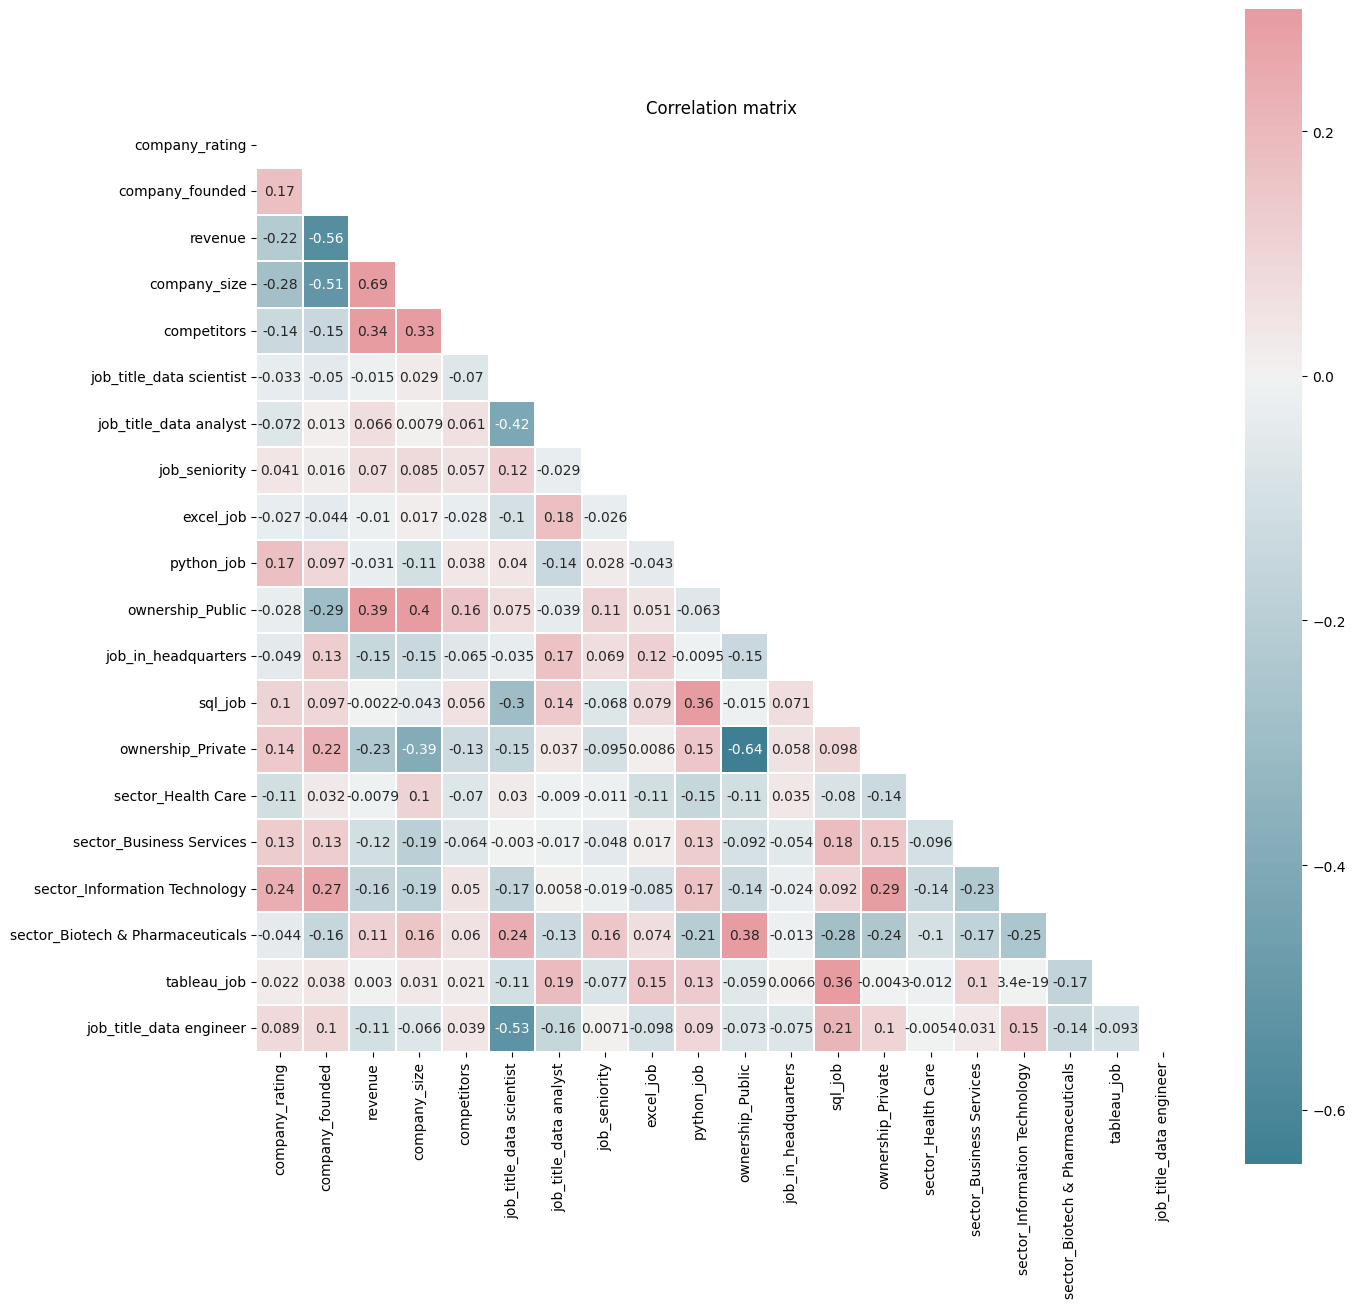

In [116]:
# Finding and plotting the correlation matrix for top20 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X[top20_feature.index].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')

_Range of correlation are as follows:_
* **Strong correlation: X > 0.7**
* **Moderate correlation: 0.5 < X < 0.7**
* **Weak correlation: X < 0.5**
<br/><br/>

**Insight:** From the correlation matrix, it is evident that features **(ownership_Public, ownership_Private), (company_size, company_founded), (job_title_data engineer, job_title_data scientist) and (company_founded, revenue) are moderately correlated.** Hence, dropping 'Revenue', 'ownership_Public', 'job_title_data engineer' and 'company_size' features.

In [117]:
X = X[top20_feature.index]
X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job_title_data engineer'], axis=1, inplace=True)

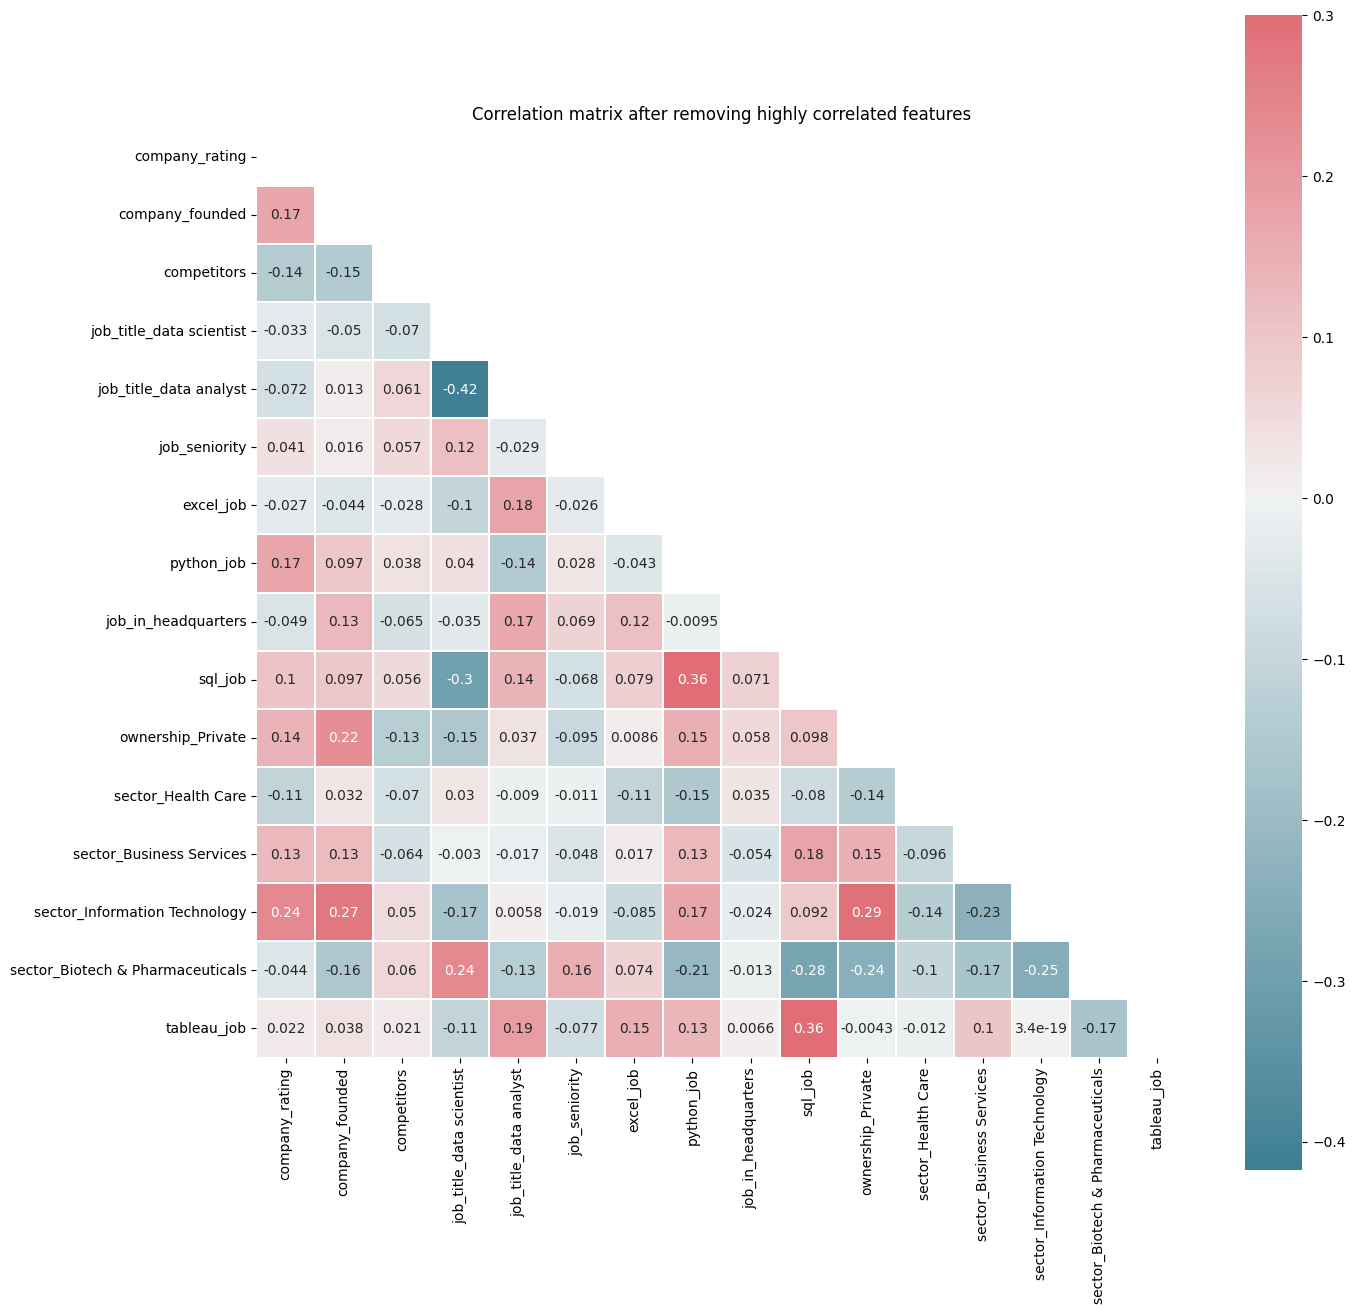

In [118]:
# Finding and plotting the correlation matrix for top 18 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [119]:
X.columns

Index(['company_rating', 'company_founded', 'competitors',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority',
       'excel_job', 'python_job', 'job_in_headquarters', 'sql_job',
       'ownership_Private', 'sector_Health Care', 'sector_Business Services',
       'sector_Information Technology', 'sector_Biotech & Pharmaceuticals',
       'tableau_job'],
      dtype='object')

In [120]:
# Rearranging the columns

X = X[['company_rating', 'company_founded', 'competitors',
       'sector_Health Care', 'sector_Business Services', 'sector_Information Technology',
       'ownership_Private', 'sector_Biotech & Pharmaceuticals',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority', 'job_in_headquarters',
       'excel_job', 'python_job', 'tableau_job', 'sql_job',]]

**Feature Scaling**<br/>
Scaling features using **StandardScaler library**

In [121]:
X.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,3.8,1973,0,False,False,False,True,False,True,False,0,0,1,1,1,0
1,3.4,1984,0,True,False,False,False,False,True,False,0,0,0,1,0,0
2,4.8,2010,0,False,True,False,True,False,True,False,0,1,1,1,0,1
3,3.8,1965,3,False,False,False,False,False,True,False,0,1,0,1,0,0
4,2.9,1998,3,False,True,False,True,False,True,False,0,1,1,1,0,1


In [122]:
#scaling the feature values between 0 to 1
from sklearn.preprocessing import StandardScaler
X_prev = X.copy()

sc_rating = StandardScaler()
X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])

sc_founded = StandardScaler()
X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])

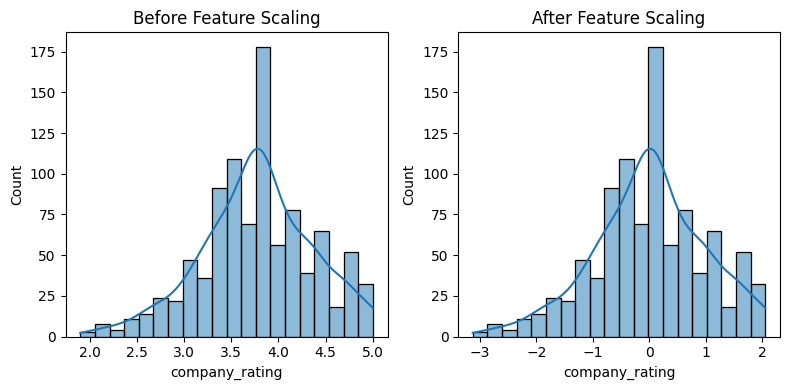

In [135]:
# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.histplot(X_prev['company_rating'],kde=True)
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.histplot(X['company_rating'],kde=True)
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

_**Insight: Feature Scaling doesnot change the distribution of the data**, it only reduces the scale of that particular feature._

In [124]:
X.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,0.048588,-0.086728,0,False,False,False,True,False,True,False,0,0,1,1,1,0
1,-0.620043,0.138799,0,True,False,False,False,False,True,False,0,0,0,1,0,0
2,1.720165,0.671863,0,False,True,False,True,False,True,False,0,1,1,1,0,1
3,0.048588,-0.250748,3,False,False,False,False,False,True,False,0,1,0,1,0,0
4,-1.455831,0.425833,3,False,True,False,True,False,True,False,0,1,1,1,0,1


# **Model Building & Evaluation**
_Metric: Negative Root Mean Squared Error (NRMSE)_

* Multiple Linear Regression: -27.523 NRMSE
* Lasso Regression (L1 Regularization): -27.993 NRMSE
* **Random Forest (Ensemble): -17.637 NRMSE**
* Gradient Boosting: -24.429 NRMSE
* Voting (Random Forest + Gradient Boosting): -19.136 NRMSE



In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.523 ---
Standard Deviation: 2.307


In [127]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.993 ---
Standard Deviation: 1.796


In [128]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -17.884 ---
Standard Deviation: 5.389


In [129]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -24.434 ---
Standard Deviation: 2.533


_**Note: Random Forest & Gradient Boosting algorithms are selected amongst all the other algorithms** because they have the highest value for Negative Root Mean Squared Error (NRMSE) i.e. lowest value for Root Mean Squared Error (RMSE) metric. And **fed to Voting algorithm** to reduce the error!_

In [130]:
# Fitting Random Forest and Gradient Boosting to Voting Regressor
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gb)], weights=[2,1])
cv = cross_val_score(vr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -19.195 ---
Standard Deviation: 4.204


_**Note:** Voting algorithm too did not perform well as compared to Random Forest algorithm, hence **Random Forest algorithm is selected for predicting the results of this problem statement.**_

# **Making Predictions**

In [131]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [132]:
def predict_salary(rating, founded, competitors, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):

  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
  prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))
  prediction_input.append(competitors)
  

  sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                    'sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp


  return rf.predict([prediction_input])[0]

In [136]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 16) + inhomogeneous part.

In [ ]:
# Prediction 2
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(3.0, 2000, 1, 'Health Care', 'Public', 'data analyst', 0, 'jr', ['python', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))